# World Happiness Report Project

<b>Project Description</b>

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


<b>What are the residuals?</b>

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

<b>What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?</b>

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

So we have 158 rows and 12 columns from which happiness score will be our target variable and others are independent variables

In [3]:
df.head(5)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [4]:
df.tail(5)

Country                           Region  Happiness Rank  \
153   Rwanda               Sub-Saharan Africa             154   
154    Benin               Sub-Saharan Africa             155   
155    Syria  Middle East and Northern Africa             156   
156  Burundi               Sub-Saharan Africa             157   
157     Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726

# EDA

### Get general information about the dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

we can check here all the datas whether matches their datatypes or not

In [7]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

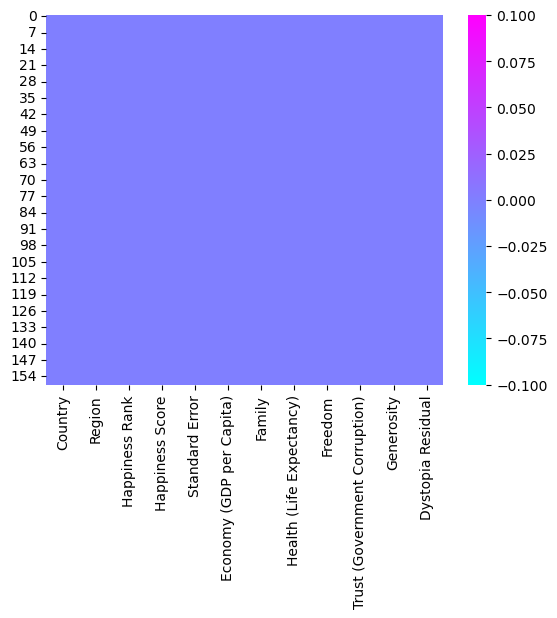

In [9]:
sns.heatmap(df.isnull(),cmap="cool")

found visually there is no null values

In [10]:
#checking number of unique values in each column
df.nunique().to_frame("No.of unique values")

No.of unique values
Country                                        158
Region                                          10
Happiness Rank                                 157
Happiness Score                                157
Standard Error                                 153
Economy (GDP per Capita)                       158
Family                                         158
Health (Life Expectancy)                       157
Freedom                                        158
Trust (Government Corruption)                  157
Generosity                                     158
Dystopia Residual                              158

In [11]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [12]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [13]:
df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [14]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [15]:
df.corr()

Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.158516        -0.177254   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.733644         0.740605   
Health (Life Expectancy)            -0.735613         0.724200   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.372315         0.395199   
Generosity                          -0.160142         0.180319   
Dystopia Residual                   -0.521999         0.530474   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.158516                 -0.785267   
Happiness Score                     -0.177254                  0.780966   
Standard Error                       1.000000                 -0.217651   
Economy (GDP per Capita)            -0.217651                  1.000000   
Family                              -0.120728                  0.645299   
Health (Life Expectancy)            -0.310287                  0.816478   
Freedom                             -0.129773                  0.370300   
Trust (Government Corruption)       -0.178325                  0.307885   
Generosity                          -0.088439                 -0.010465   
Dystopia Residual                    0.083981                  0.040059   

                                 Family  Health (Life Expectancy)   Freedom  \
Happiness Rank                -0.733644                 -0.735613 -0.556886   
Happiness Score                0.740605                  0.724200  0.568211   
Standard Error                -0.120728                 -0.310287 -0.129773   
Economy (GDP per Capita)       0.645299                  0.816478  0.370300   
Family                         1.000000                  0.531104  0.441518   
Health (Life Expectancy)       0.531104                  1.000000  0.360477   
Freedom                        0.441518                  0.360477  1.000000   
Trust (Government Corruption)  0.205605                  0.248335  0.493524   
Generosity                     0.087513                  0.108335  0.373916   
Dystopia Residual              0.148117                  0.018979  0.062783   

                               Trust (Government Corruption)  Generosity  \
Happiness Rank                                     -0.372315   -0.160142   
Happiness Score                                     0.395199    0.180319   
Standard Error                                     -0.178325   -0.088439   
Economy (GDP per Capita)                            0.307885   -0.010465   
Family                                              0.205605    0.087513   
Health (Life Expectancy)                            0.248335    0.108335   
Freedom                                             0.493524    0.373916   
Trust (Government Corruption)                       1.000000    0.276123   
Generosity                                          0.276123    1.000000   
Dystopia Residual                                  -0.033105   -0.101301   

                               Dystopia Residual  
Happiness Rank                         -0.521999  
Happiness Score                         0.530474  
Standard Error                          0.083981  
Economy (GDP per Capita)                0.040059  
Family                                  0.148117  
Health (Life Expectancy)                0.018979  
Freedom                                 0.062783  
Trust (Government Corruption)          -0.033105  
Generosity                             -0.101301  
Dystopia Residual                       1.000000

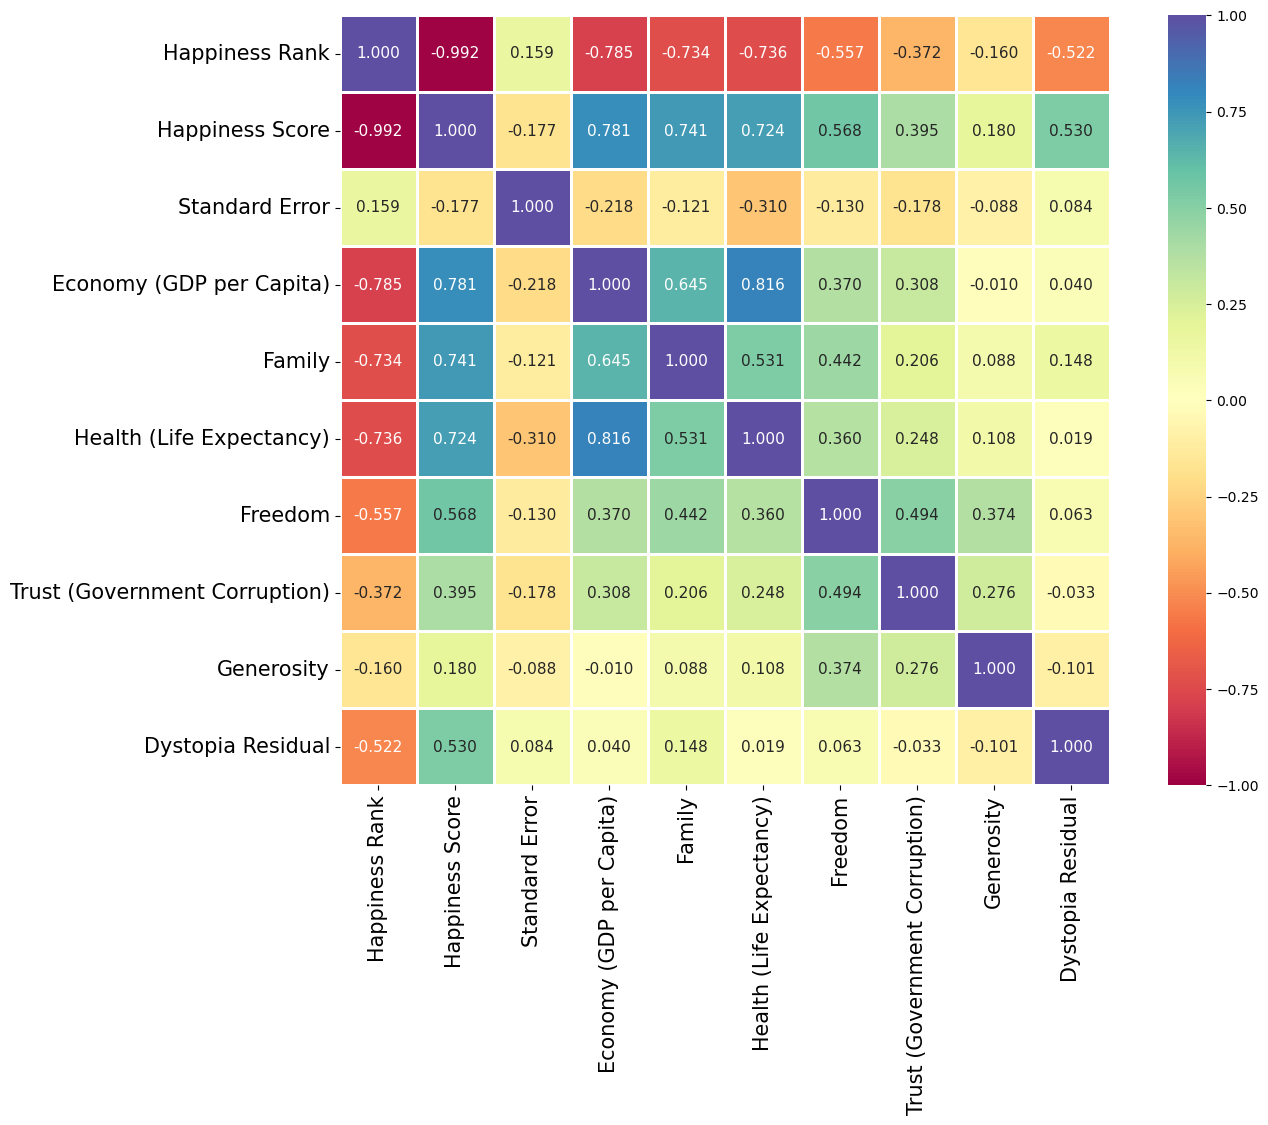

In [16]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':11}, cmap="Spectral",linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Thus we see that happiness score is highly correlated with Economy, Family and health.

<AxesSubplot:>

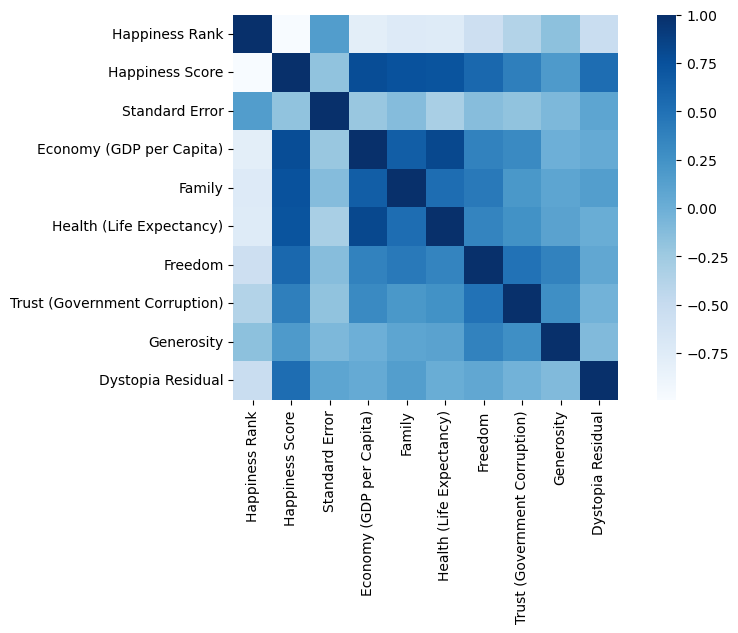

In [17]:
cor=df.corr(method="pearson")
f,ax=plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap="Blues", square=True, ax=ax)


# data visualization

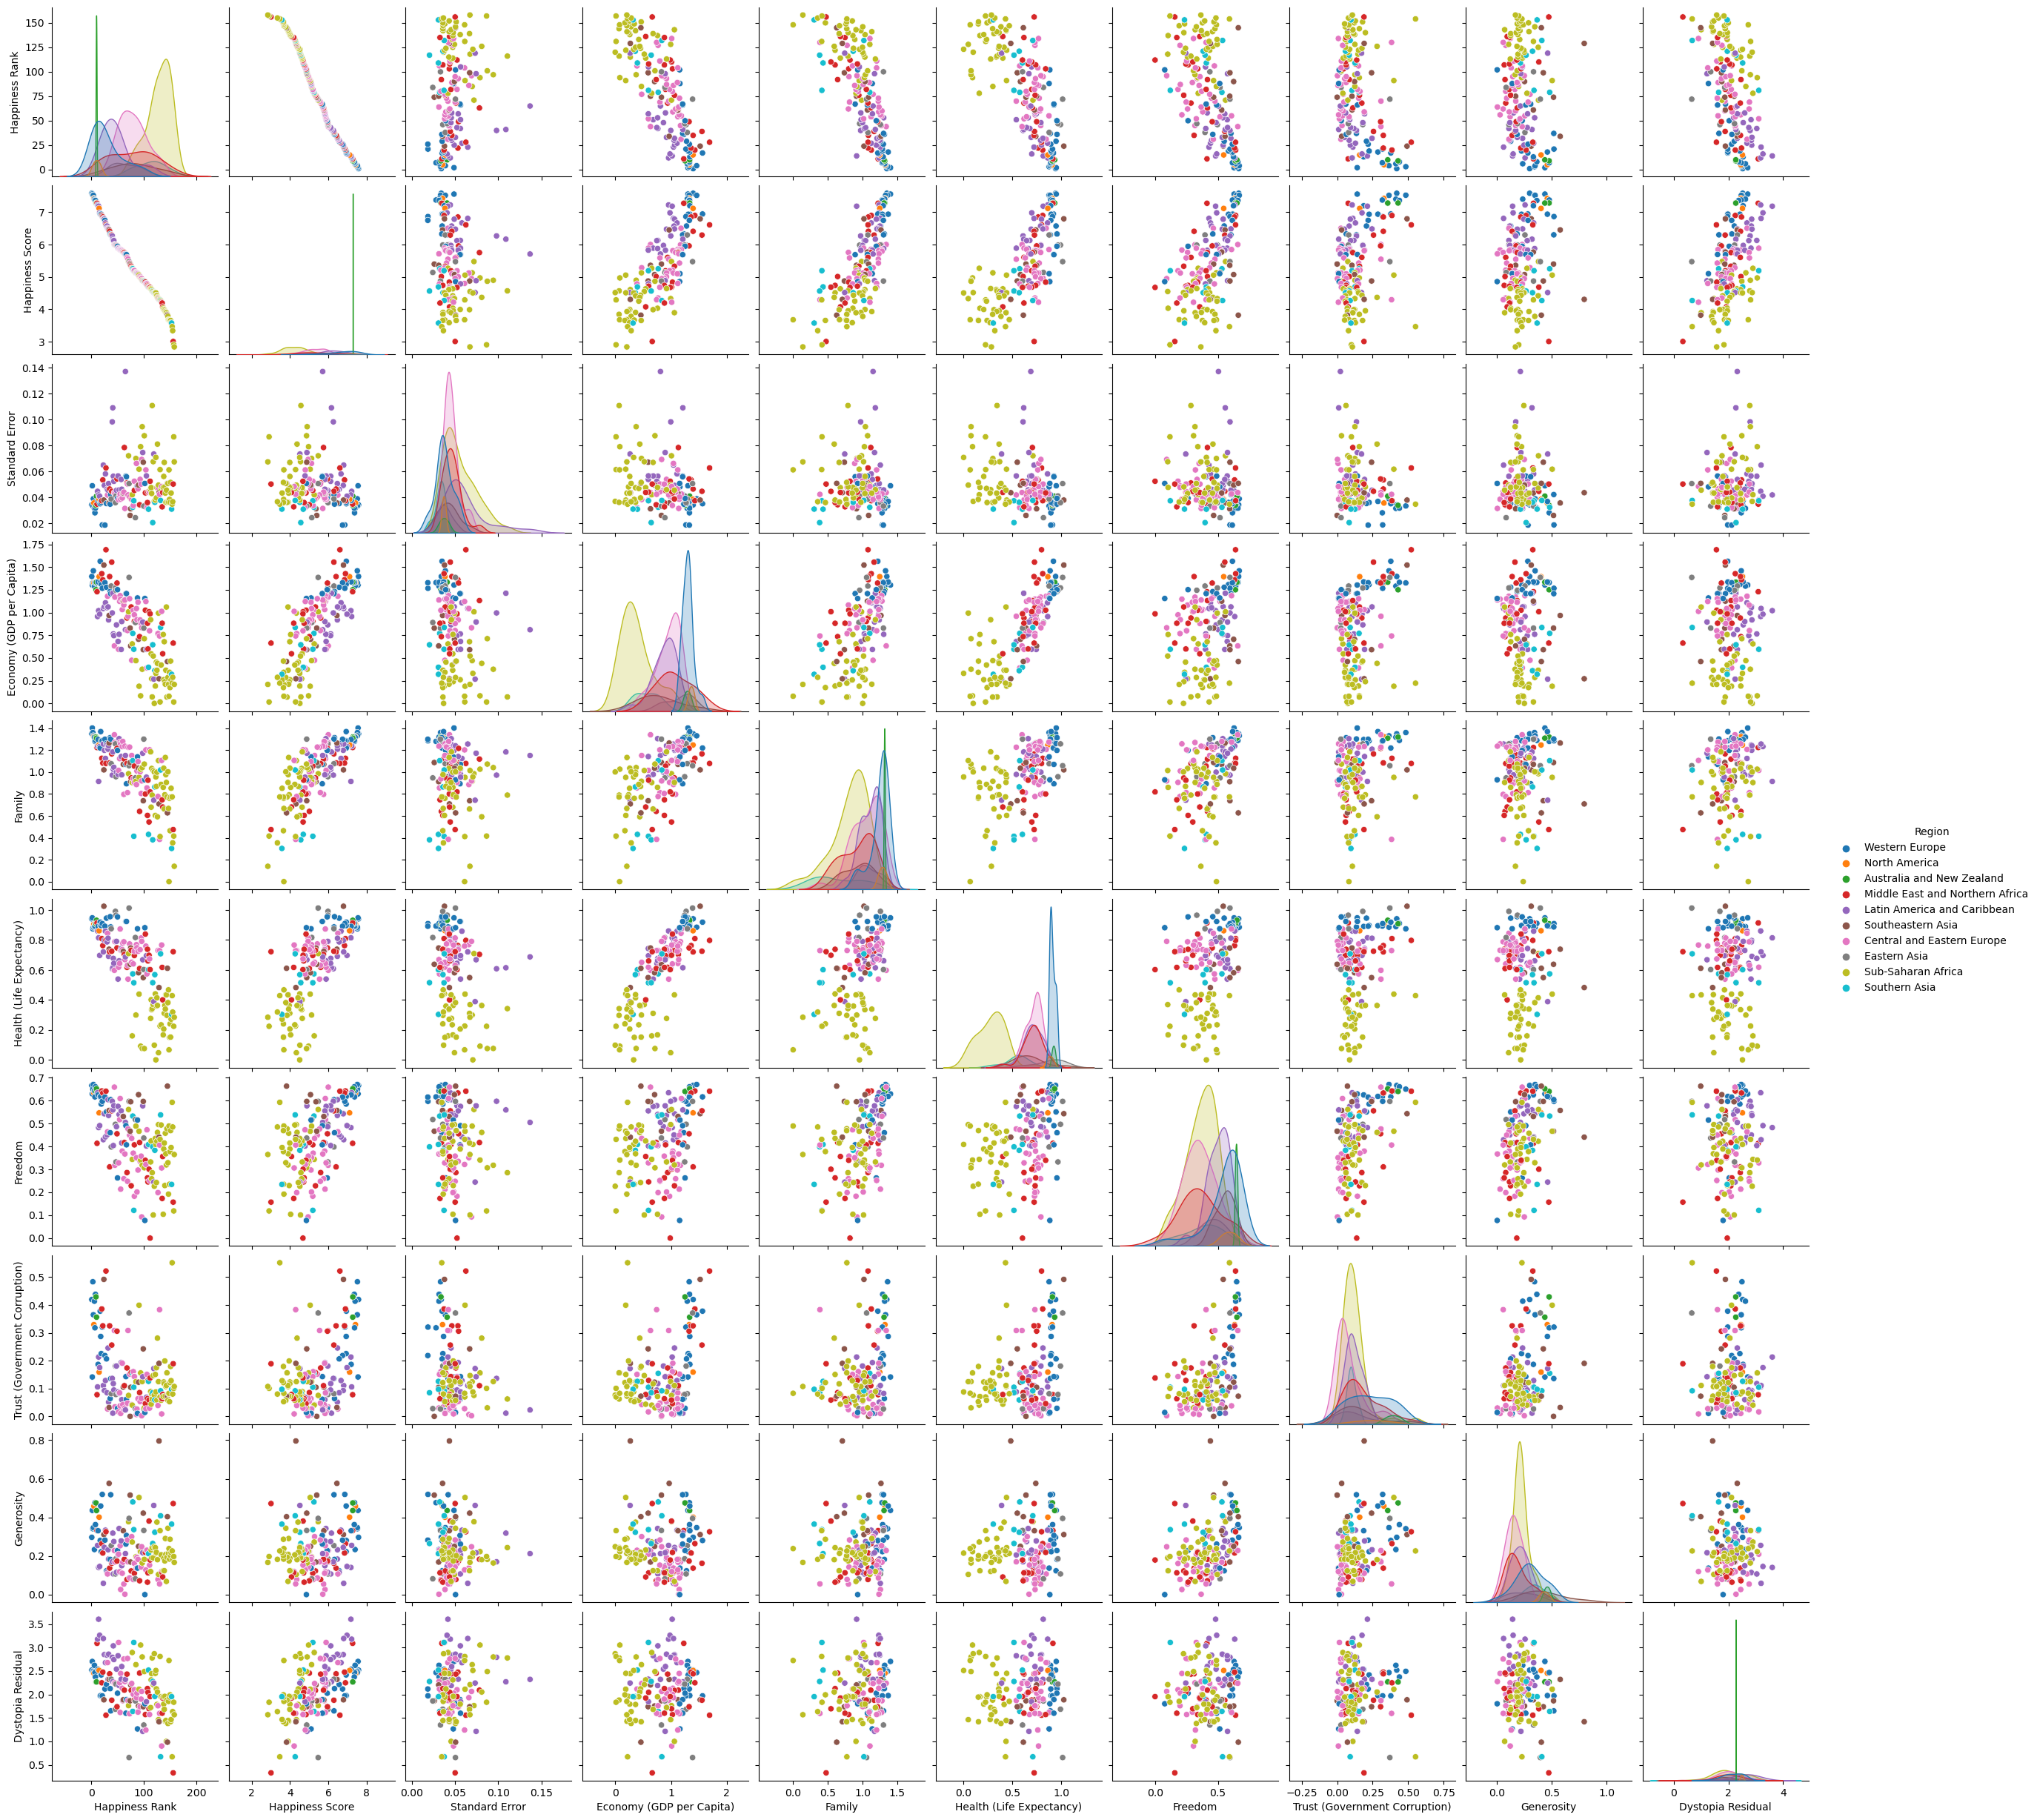

In [18]:
sns.pairplot(df,hue='Region')

In [19]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [20]:
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["font.size"]=15
plt.rcParams["figure.figsize"]=(10,8)
plt.rcParams['figure.facecolor'] = '#FFE584'

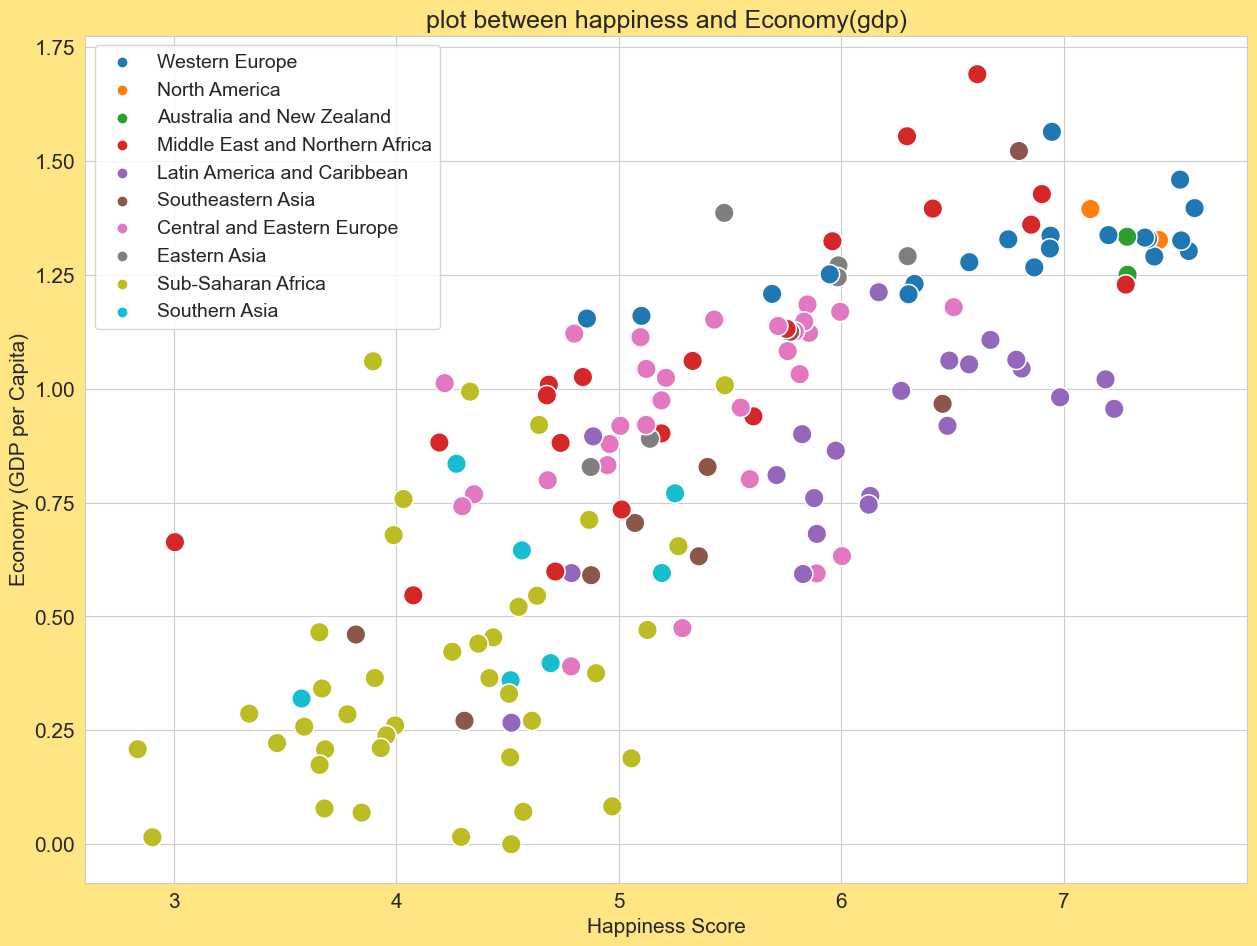

In [21]:
#plot between happiness and Economy(gdp)

plt.rcParams['figure.figsize'] = (15,11)
plt.title("plot between happiness and Economy(gdp)")
sns.scatterplot(x=df["Happiness Score"], y = df["Economy (GDP per Capita)"], hue=df.Region,s = 200);

plt.legend(loc = "upper left",fontsize = "14")
plt.xlabel("Happiness Score")
plt.ylabel("Economy (GDP per Capita)")
plt.show()

bullets indicate that the countries happiness is based on GDP per capita starts from less than 0.25

In [22]:
#GDP by region

gdp_region = df.groupby("Region")["Economy (GDP per Capita)"].sum()
gdp_region


Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

it  represents which region has highest % contribution to the worlds GDP as per the dataset

Text(0, 0.5, '')

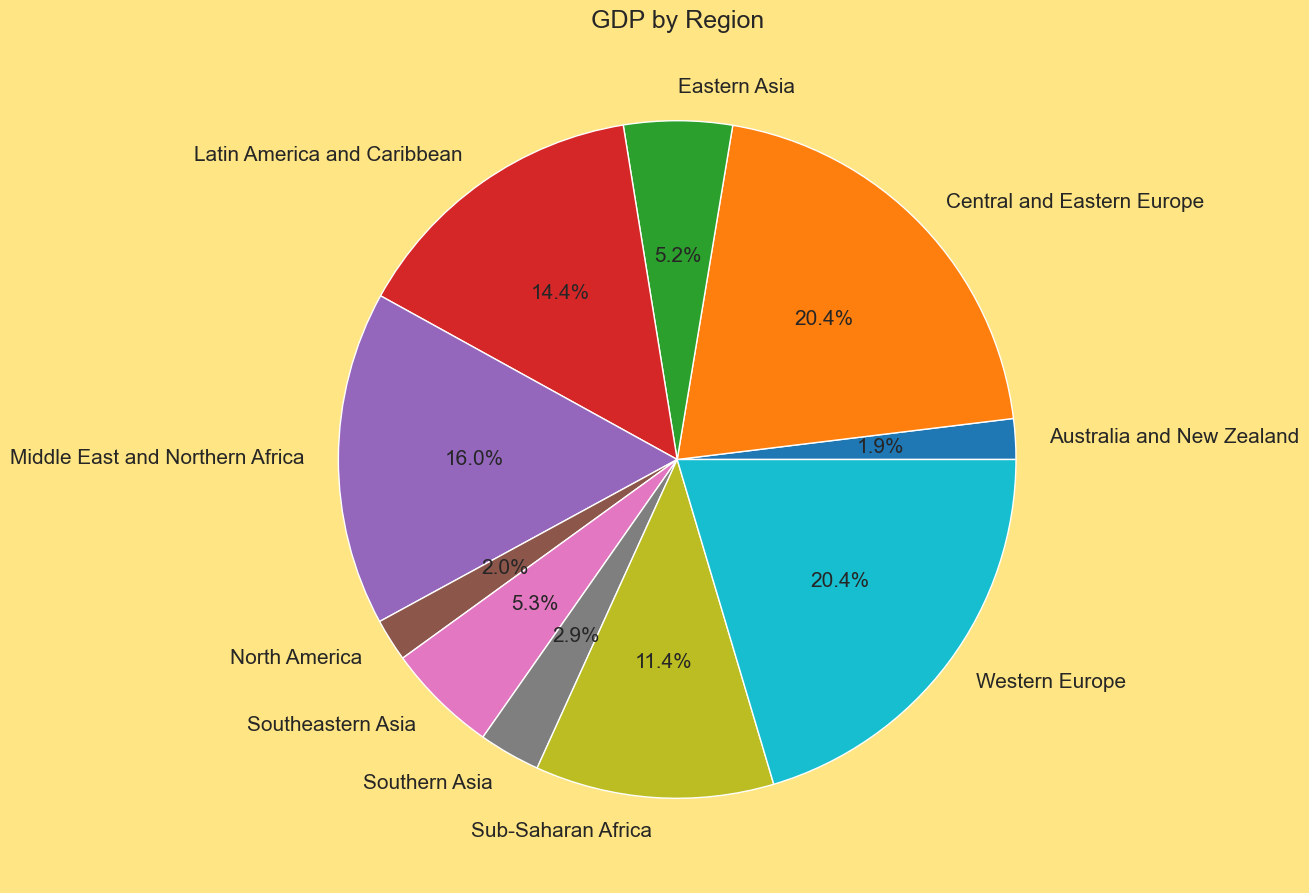

In [23]:
gdp_region.plot.pie(autopct= "%1.1f%%")
plt.title("GDP by Region")
plt.ylabel("")


In [24]:
#Total countries

total_country=df.groupby("Region")[["Country"]].count()
total_country

Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21

In [25]:
#corruption in regions

corruption=df.groupby("Region")[['Trust (Government Corruption)']].mean()
corruption

Trust (Government Corruption)
Region                                                        
Australia and New Zealand                             0.392795
Central and Eastern Europe                            0.086674
Eastern Asia                                          0.127695
Latin America and Caribbean                           0.117172
Middle East and Northern Africa                       0.181702
North America                                         0.244235
Southeastern Asia                                     0.151276
Southern Asia                                         0.102536
Sub-Saharan Africa                                    0.123878
Western Europe                                        0.231463

this represents Australia and New Zealand is the highest perception of corruption as per the data

Central and Eastern Europe is the least perception of the corruption

<BarContainer object of 10 artists>

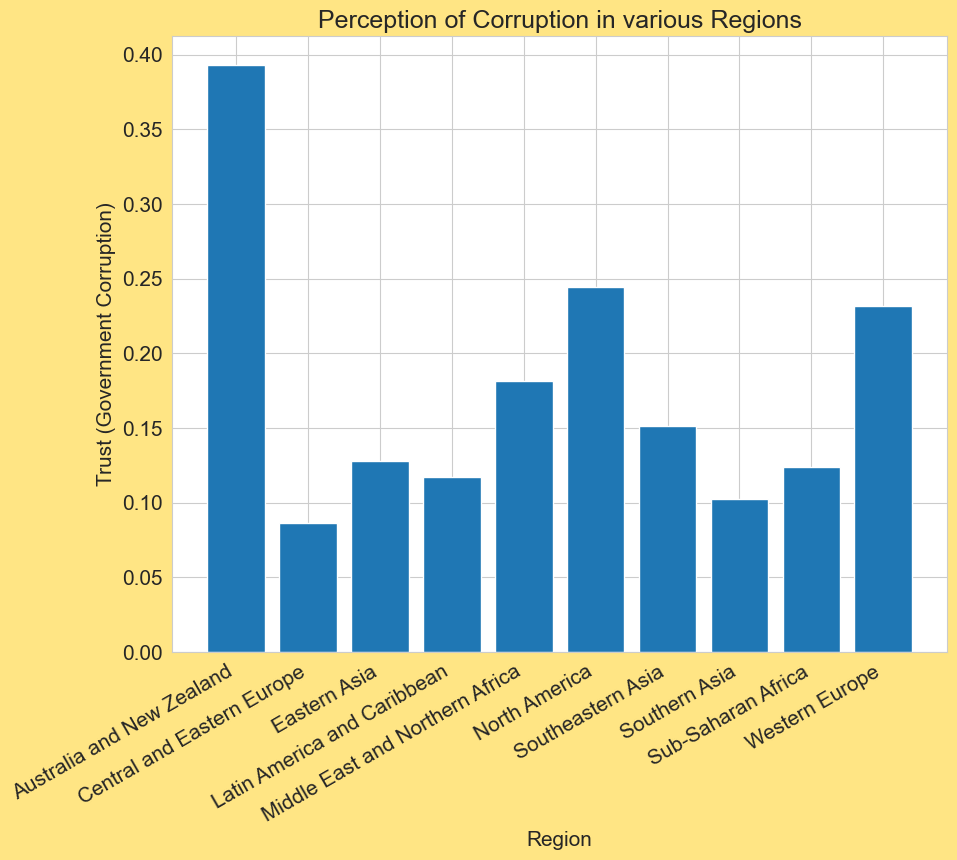

In [26]:
plt.rcParams["figure.figsize"]=(10,8)
plt.title("Perception of Corruption in various Regions")
plt.xlabel("Region", fontsize = 15)
plt.ylabel("Trust (Government Corruption)", fontsize=15)
plt.xticks(rotation = 30, ha="right")
plt.bar(corruption.index, corruption["Trust (Government Corruption)"])

In [27]:
top_10 = df.head(10)
bottom_10 = df.tail(10)

Text(941.631313131313, 0.5, 'Health (Life Expectancy)')

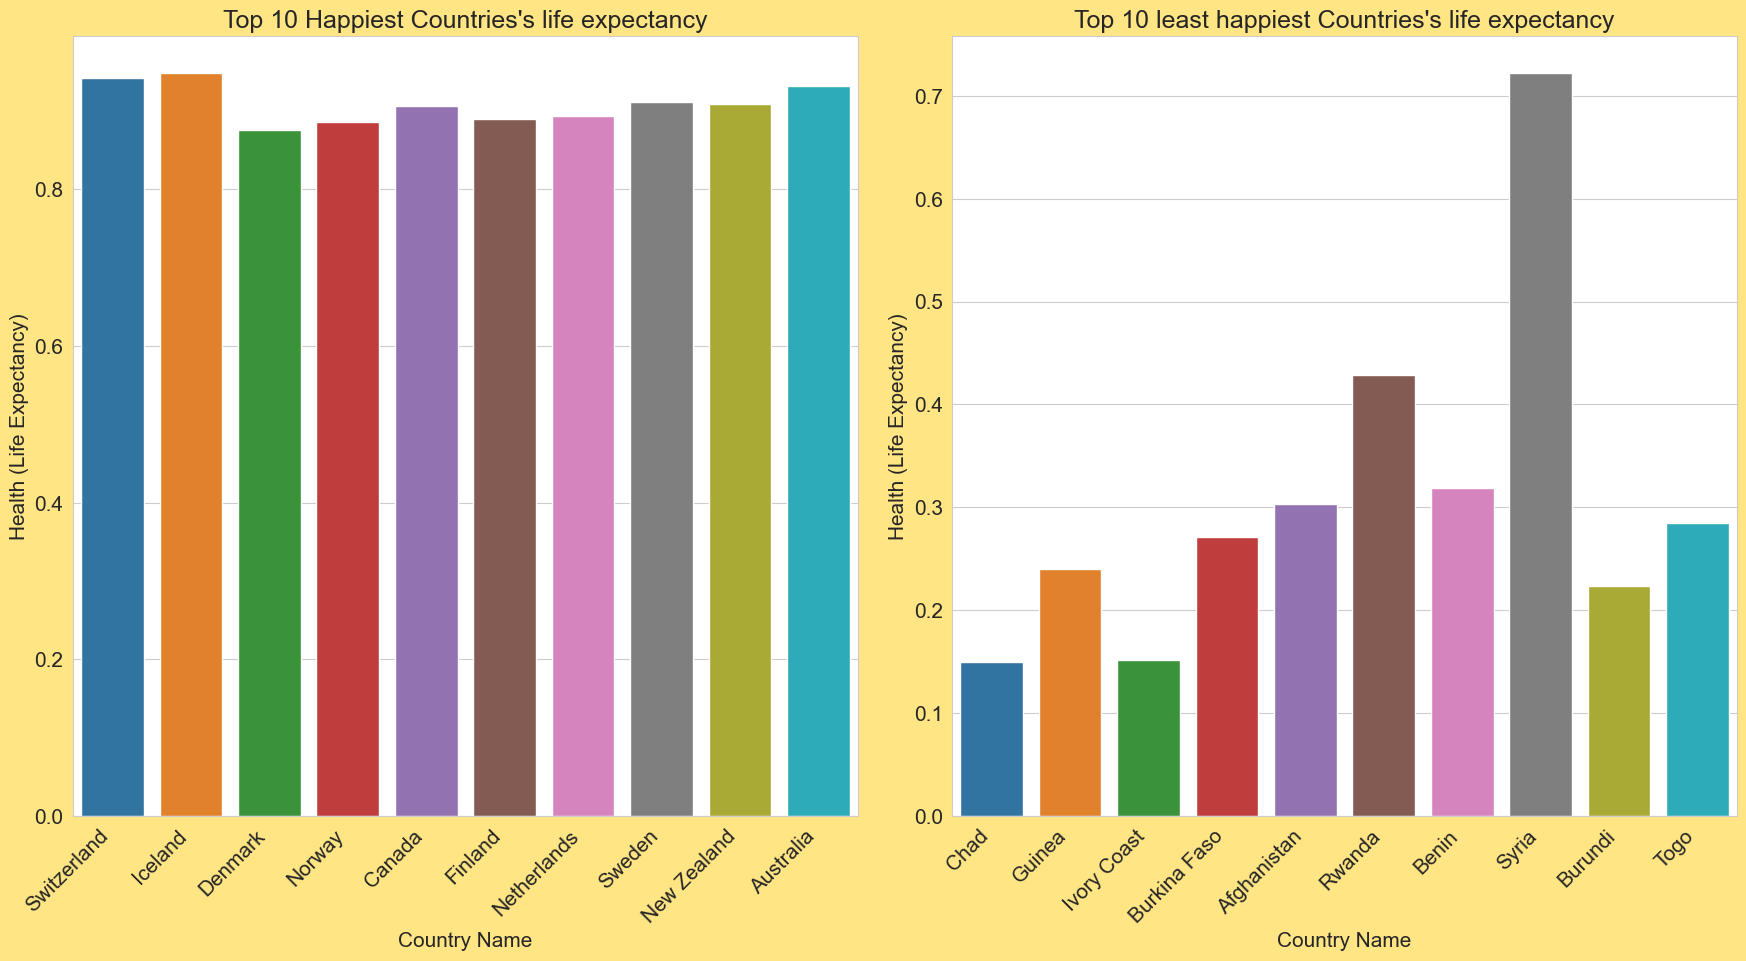

In [28]:
fig,axes=plt.subplots(1,2, figsize=(18,9))
plt.tight_layout(pad = 2)
xlabels= top_10.Country
axes[0].set_title("Top 10 Happiest Countries's life expectancy")
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.Country, y=top_10["Health (Life Expectancy)"], ax= axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel("Health (Life Expectancy)")

xlabels= bottom_10.Country
axes[1].set_title("Top 10 least happiest Countries's life expectancy")
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.Country, y=bottom_10["Health (Life Expectancy)"], ax= axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel("Health (Life Expectancy)")

iceland and switzerland are the happiest countries's life expectancy
chad and ivory coast are the least happiest country

Text(0, 0.5, 'Happiness Score')

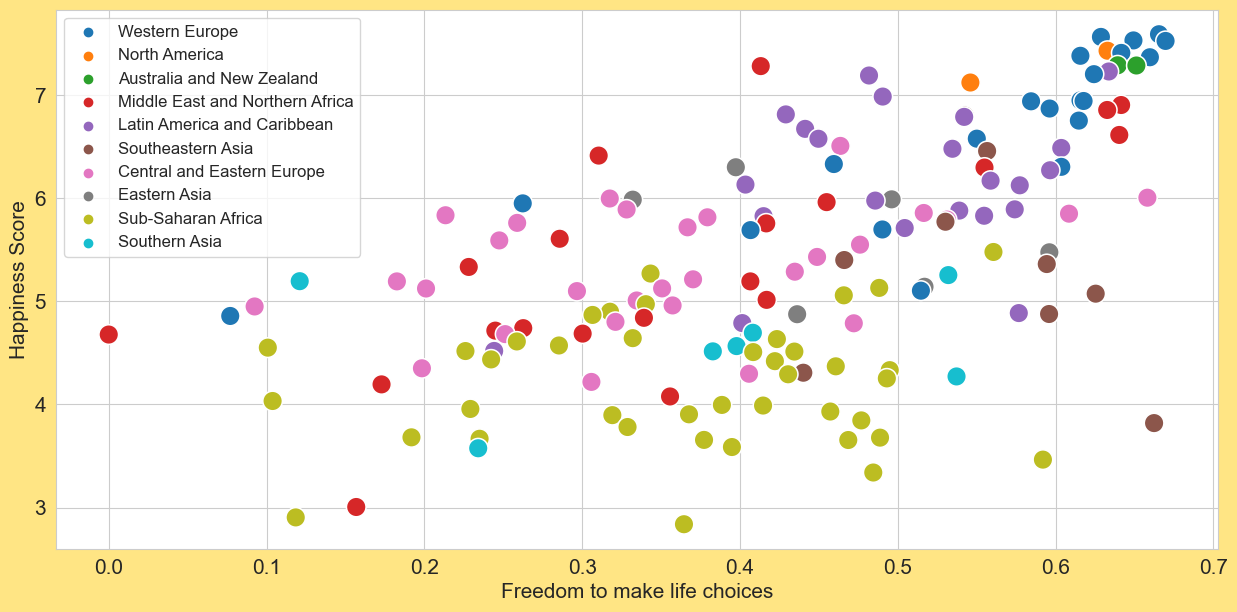

In [29]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x = df["Freedom"], y=df["Happiness Score"], hue=df["Region"], s =200 ) 
plt.legend(loc= "upper left", fontsize = '12')
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")


it shows that, when freedom to make life choices improves , then Happiness score also improves.

in some cases like Sub-Saharan africa freedom is high but happiness is low due to other crieteria.

<BarContainer object of 15 artists>

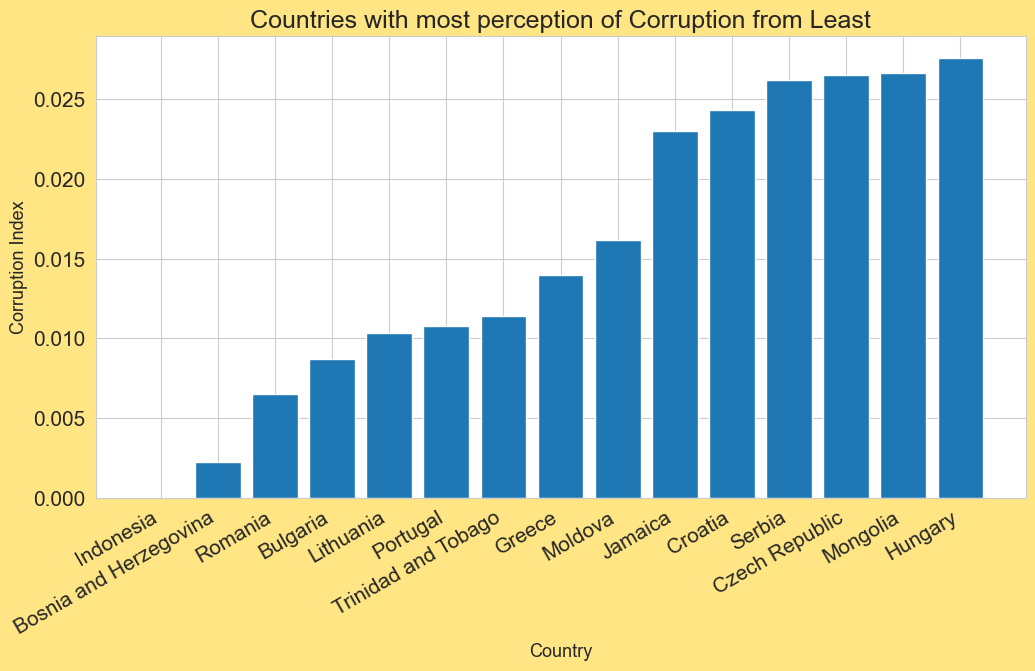

In [30]:
country= df.sort_values(by="Trust (Government Corruption)").head(15)
plt.rcParams['figure.figsize']=(12,6)
plt.title("Countries with most perception of Corruption from Least")
plt.xlabel('Country',fontsize = 13)
plt.ylabel("Corruption Index", fontsize = 13)
plt.xticks(rotation = 30, ha="right")
plt.bar(country.Country,country["Trust (Government Corruption)"])

these are the top 15 countries that least perception of corruption

indonesia is the lowest perception of corruption

<BarContainer object of 15 artists>

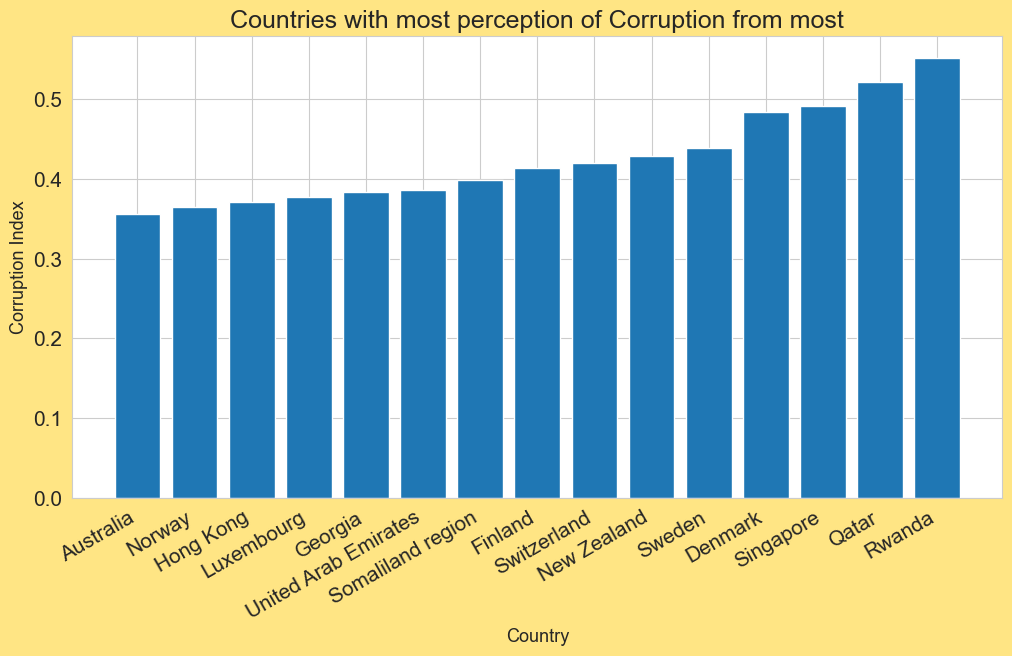

In [31]:
country= df.sort_values(by="Trust (Government Corruption)").tail(15)
plt.rcParams['figure.figsize']=(12,6)
plt.title("Countries with most perception of Corruption from most")
plt.xlabel('Country',fontsize = 13)
plt.ylabel("Corruption Index", fontsize = 13)
plt.xticks(rotation = 30, ha="right")
plt.bar(country.Country,country["Trust (Government Corruption)"])

these are the top 15 countries that MOST perception of corruption

RWANDA is the most perception of corruption.

Text(0, 0.5, 'Corruption')

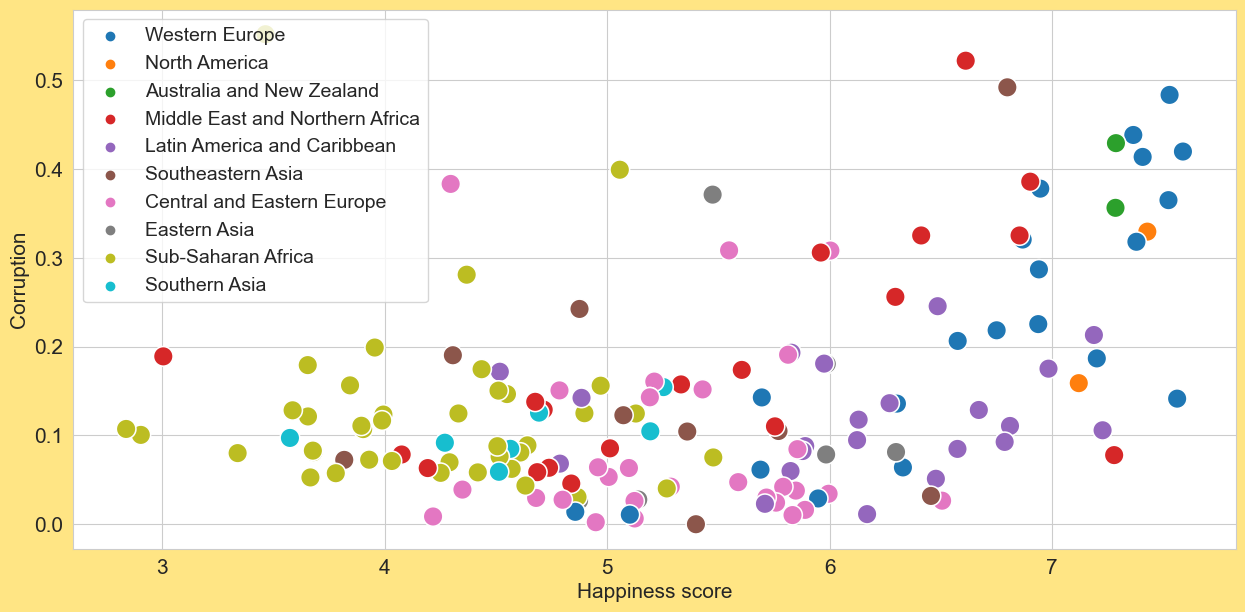

In [32]:
#corruption vs happiness

plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = df["Happiness Score"], y=df["Trust (Government Corruption)"], hue= df["Region"], s= 200)
plt.legend(loc= "upper left", fontsize = "14")
plt.xlabel("Happiness score")
plt.ylabel("Corruption")

Plot indicates that most of the happiness score is lies in where there is lower corruption rate.

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

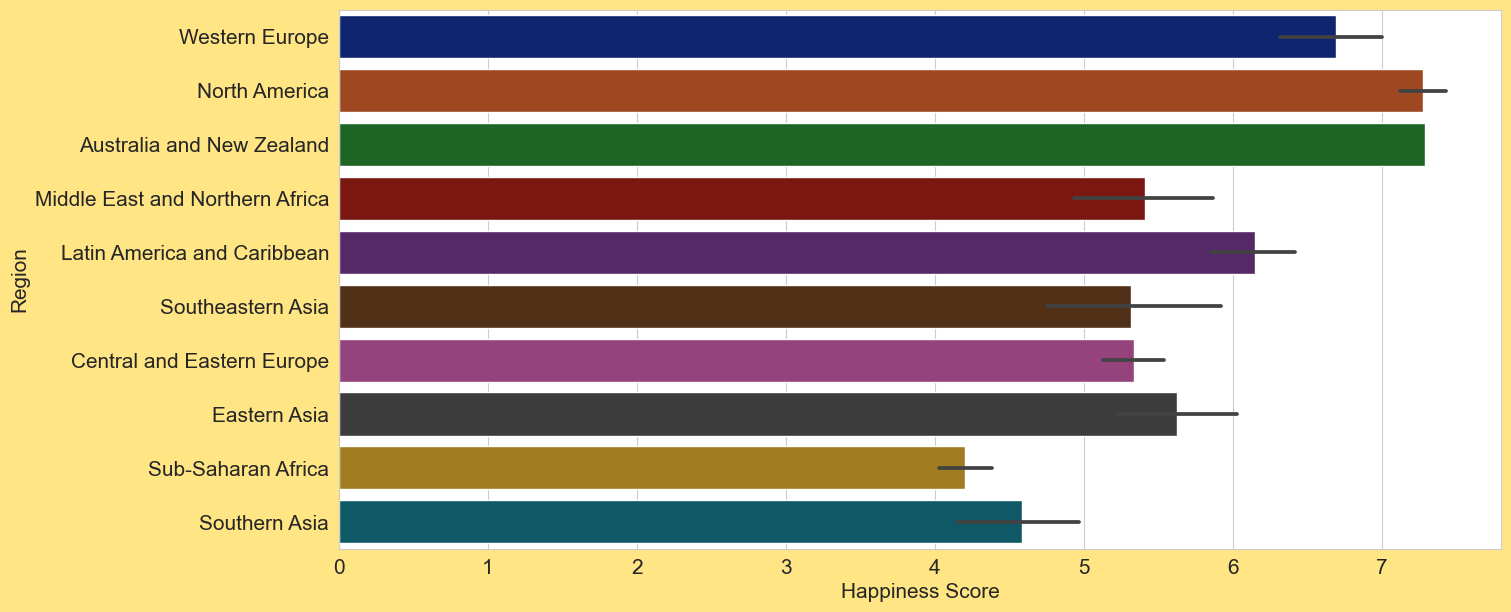

In [33]:
#Happiest country in the world

sns.barplot(x='Happiness Score',y='Region',data=df, palette='dark')

We see that among different regions North America and Australia regions are the most happiest

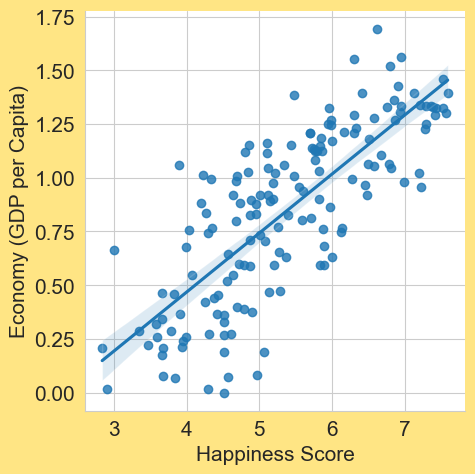

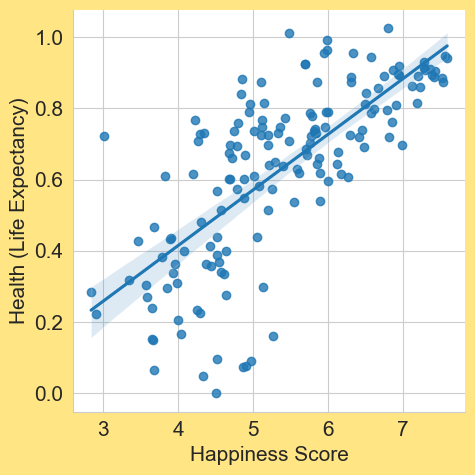

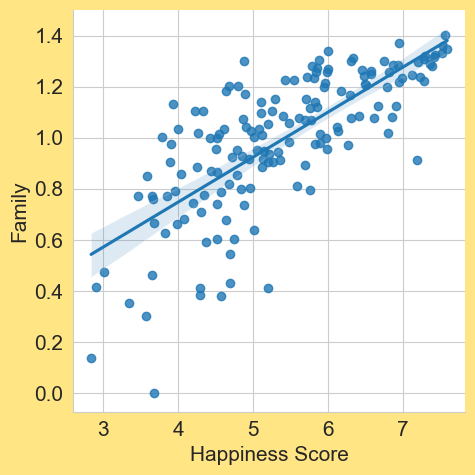

In [34]:
sns.lmplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df)
sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=df)
sns.lmplot(x='Happiness Score',y='Family',data=df)

Proving the positive relation of each Family, Economy and Health with the Happiness Score

### now checking the skewness

First encoding the Region column  

In [35]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()

In [36]:
for o in df.columns:
    if df[o].dtypes=="object":
        df[o]=oe.fit_transform(df[o].values.reshape(-1,1))

In [37]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

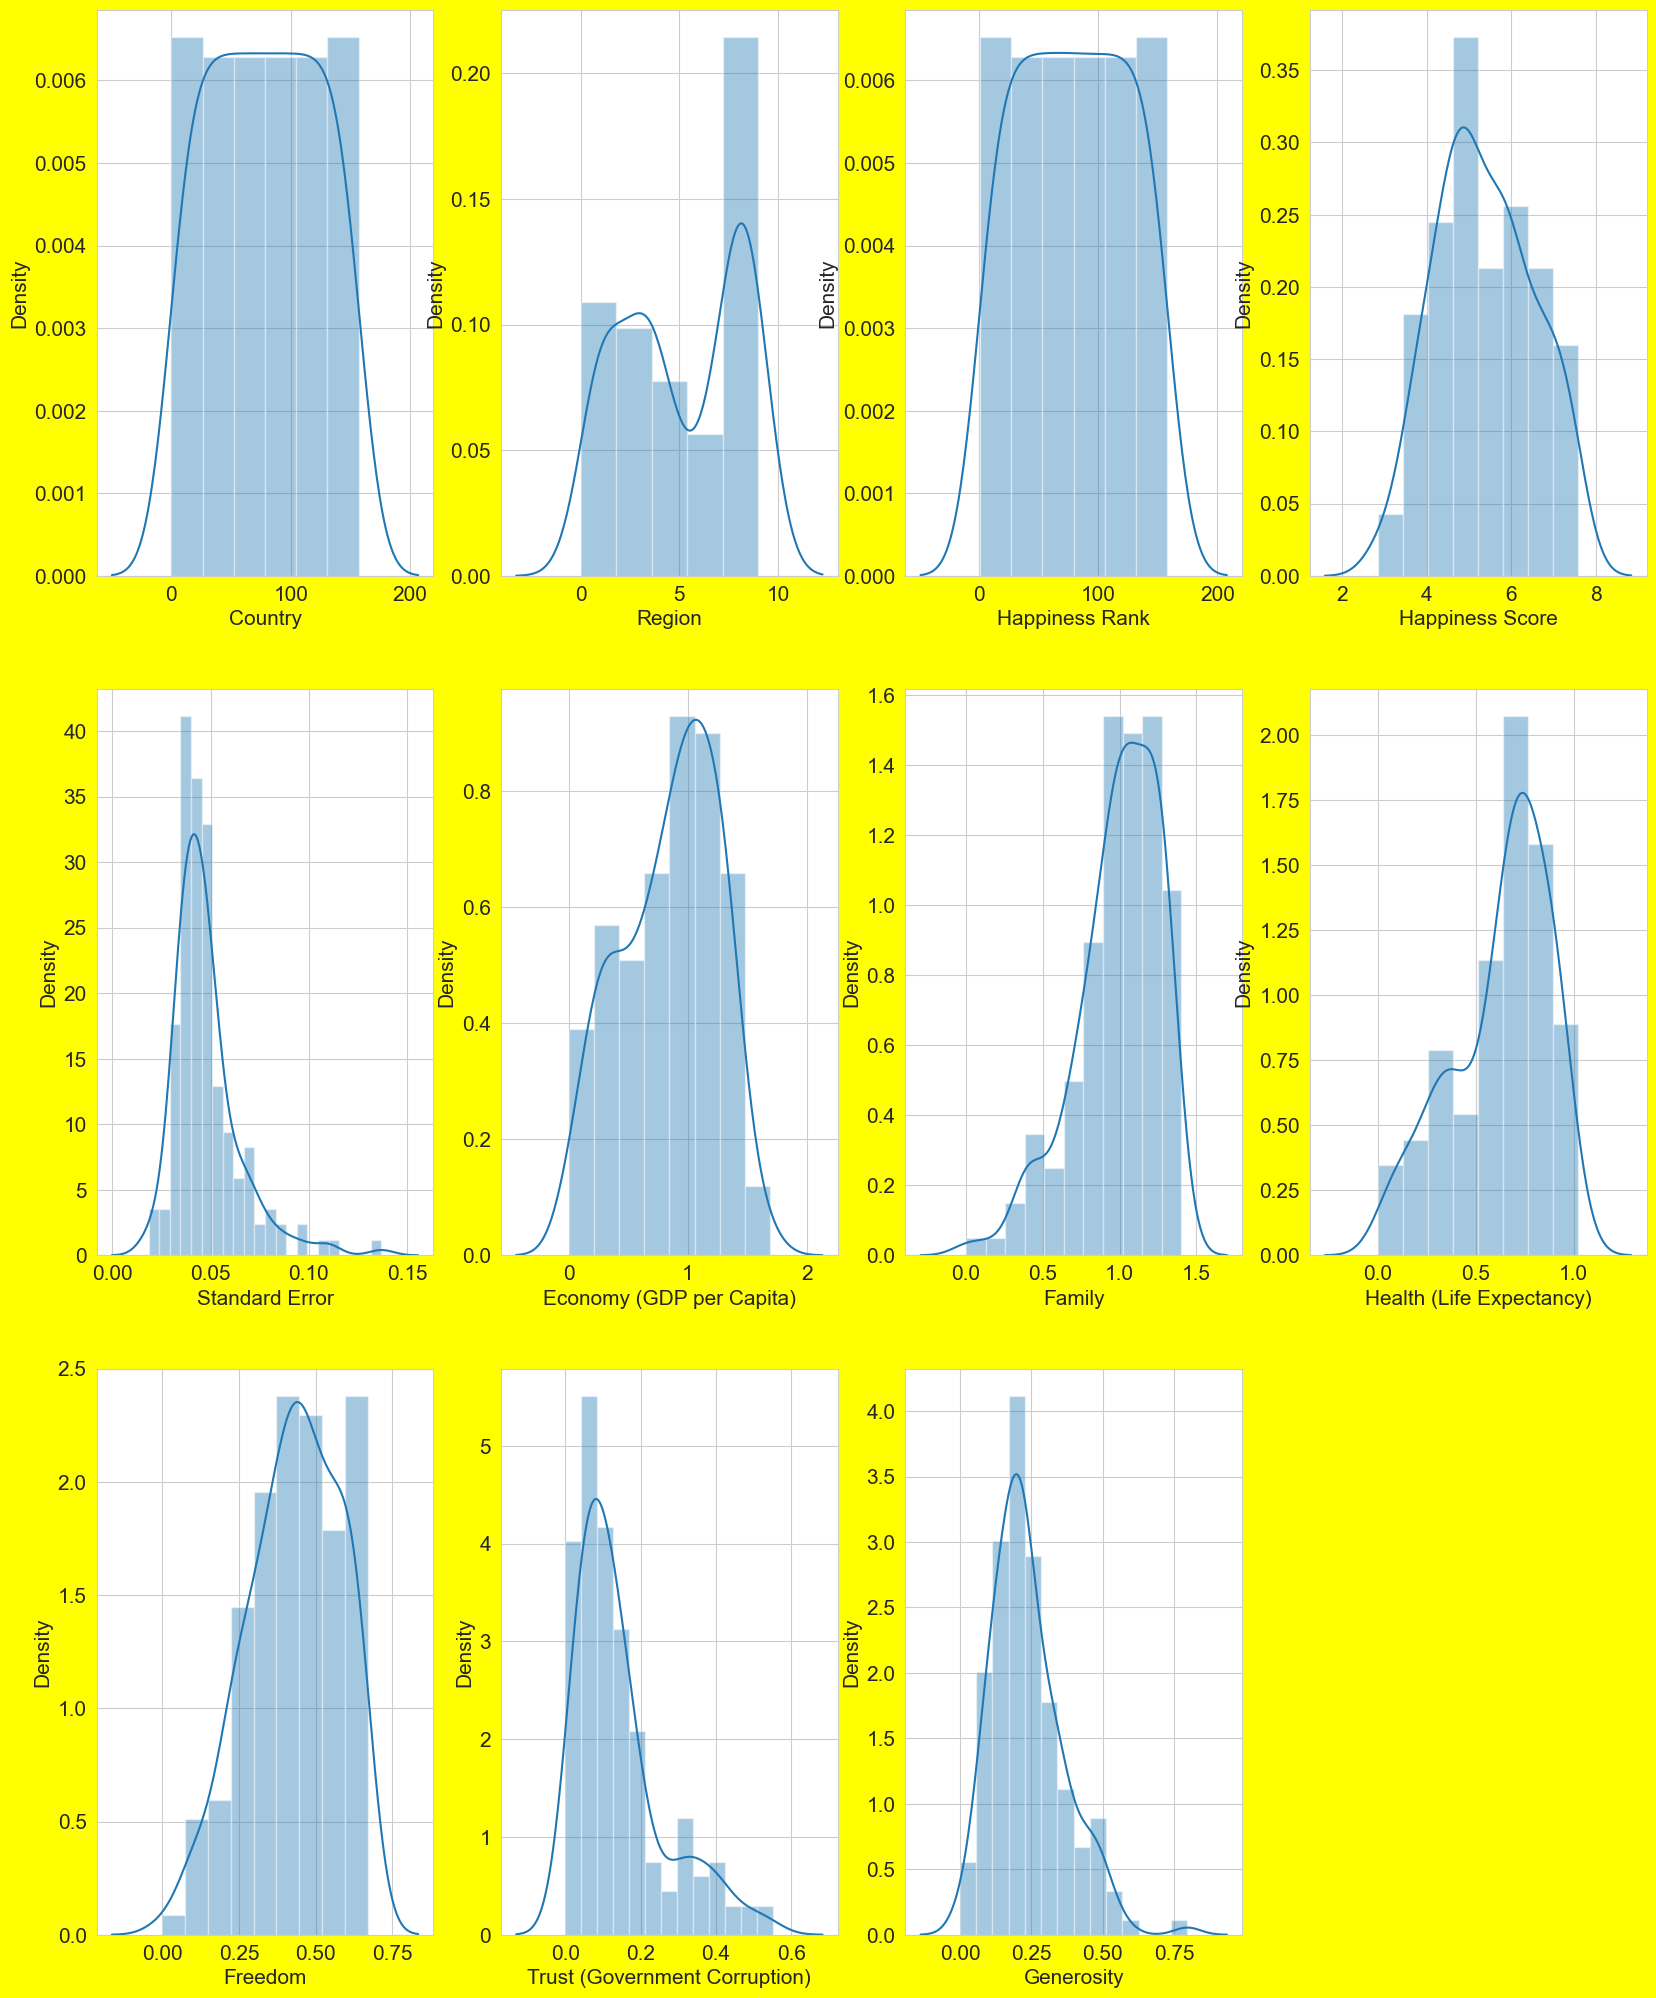

In [38]:
plt.figure(figsize=(20,25),facecolor='yellow')
pltno=1

for c in df:
    if pltno<=11:
        ax=plt.subplot(3,4,pltno)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

In [39]:
df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])

In [40]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Skewness is removed now

### Now we will check for outliers

Country                             AxesSubplot(0.125,0.53;0.110714x0.35)
Region                           AxesSubplot(0.257857,0.53;0.110714x0.35)
Happiness Rank                   AxesSubplot(0.390714,0.53;0.110714x0.35)
Happiness Score                  AxesSubplot(0.523571,0.53;0.110714x0.35)
Standard Error                   AxesSubplot(0.656429,0.53;0.110714x0.35)
Economy (GDP per Capita)         AxesSubplot(0.789286,0.53;0.110714x0.35)
Family                              AxesSubplot(0.125,0.11;0.110714x0.35)
Health (Life Expectancy)         AxesSubplot(0.257857,0.11;0.110714x0.35)
Freedom                          AxesSubplot(0.390714,0.11;0.110714x0.35)
Trust (Government Corruption)    AxesSubplot(0.523571,0.11;0.110714x0.35)
Generosity                       AxesSubplot(0.656429,0.11;0.110714x0.35)
Dystopia Residual                AxesSubplot(0.789286,0.11;0.110714x0.35)
dtype: object

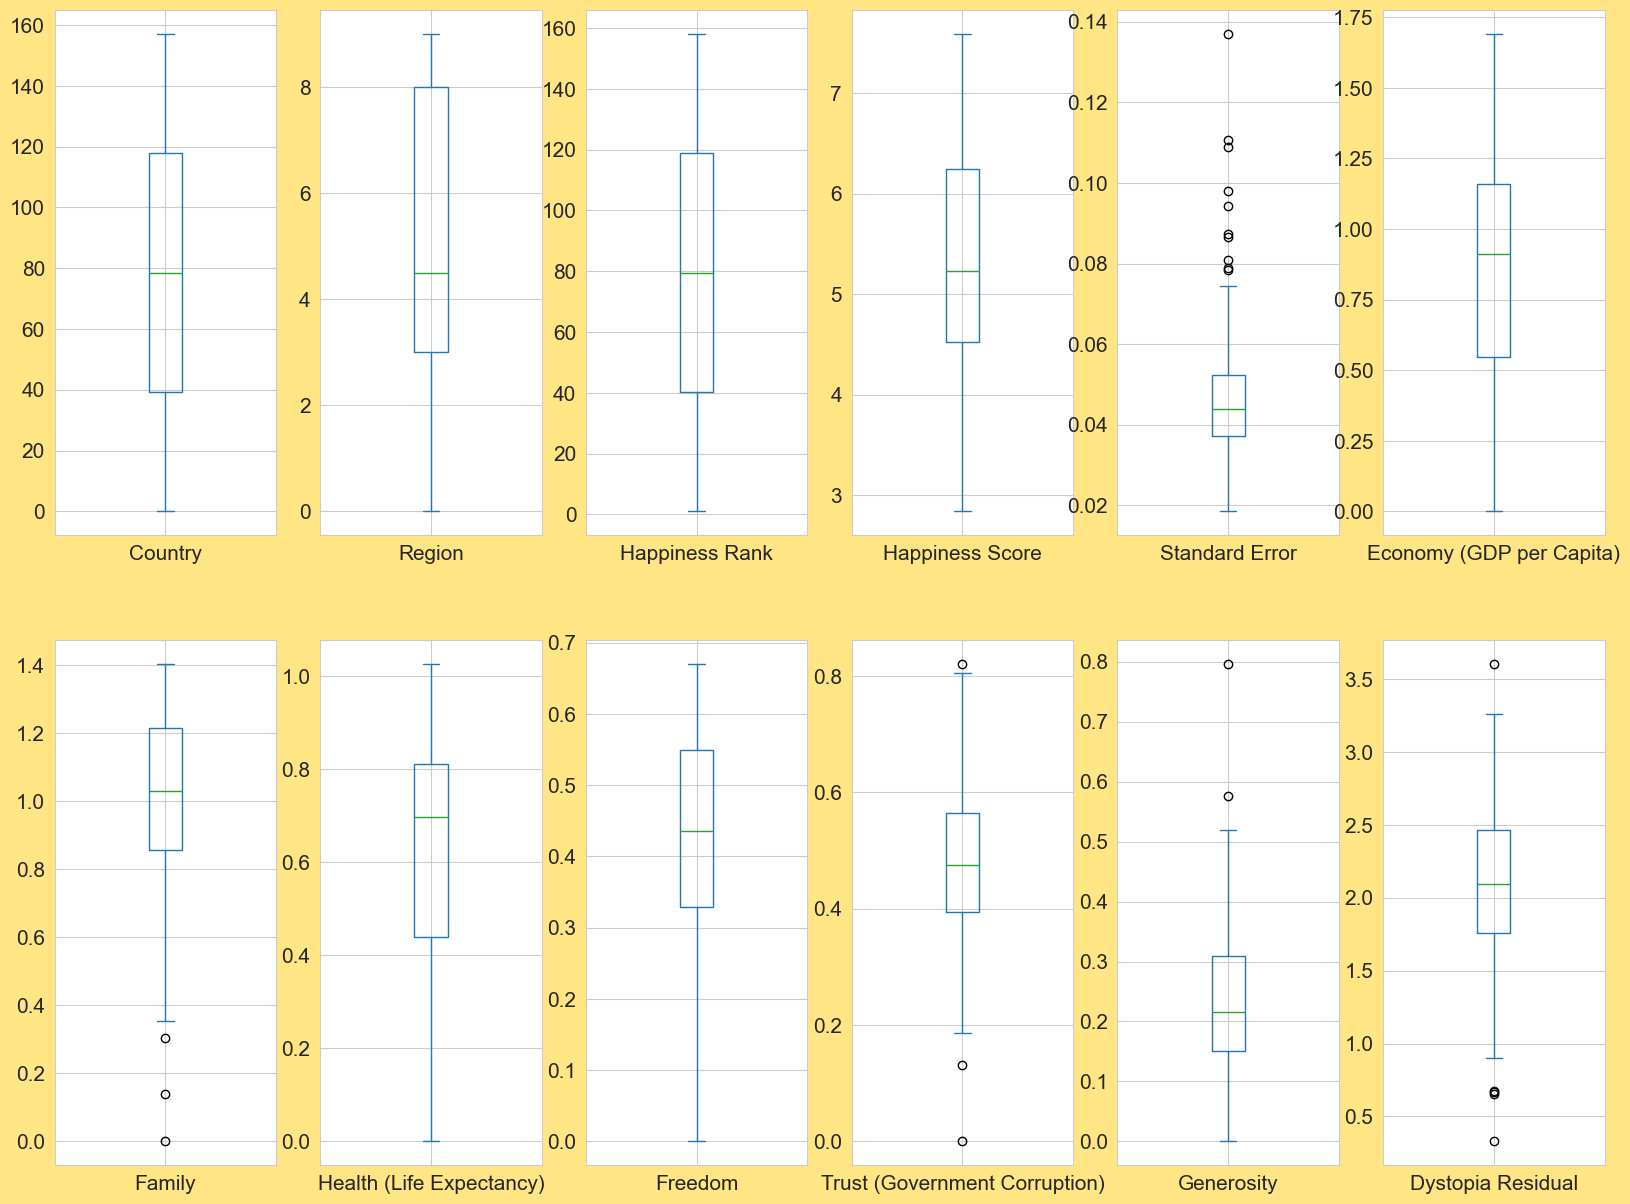

In [41]:
### Now we will check for outliers

df.plot(kind='box',subplots=True,figsize=(20,15),layout=(2,6))

We can see that some of the columns have outliers present so we will now remove the outliers

In [42]:
from scipy.stats import zscore

In [43]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

dfo=df[(z<3).all(axis=1)]
dfo 

Country  Region  Happiness Rank  Happiness Score  Standard Error  \
0      135.0     9.0               1            7.587         0.03411   
1       58.0     9.0               2            7.561         0.04884   
2       37.0     9.0               3            7.527         0.03328   
3      105.0     9.0               4            7.522         0.03880   
4       24.0     5.0               5            7.427         0.03553   
..       ...     ...             ...              ...             ...   
151     20.0     8.0             152            3.587         0.04324   
152      0.0     7.0             153            3.575         0.03084   
153    118.0     8.0             154            3.465         0.03464   
154     13.0     8.0             155            3.340         0.03656   
156     21.0     8.0             157            2.905         0.08658   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464  0.64938   
3                     1.45900  1.33095                   0.88521  0.66973   
4                     1.32629  1.32261                   0.90563  0.63297   
..                        ...      ...                       ...      ...   
151                   0.25812  0.85188                   0.27125  0.39493   
152                   0.31982  0.30285                   0.30335  0.23414   
153                   0.22208  0.77370                   0.42864  0.59201   
154                   0.28665  0.35386                   0.31910  0.48450   
156                   0.01530  0.41587                   0.22396  0.11850   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0                         0.748756     0.29678            2.51738  
1                         0.521036     0.43630            2.70201  
2                         0.784910     0.34139            2.49204  
3                         0.714677     0.34699            2.46531  
4                         0.690742     0.45811            2.45176  
..                             ...         ...                ...  
151                       0.504388     0.21747            1.46494  
152                       0.459770     0.36510            1.95210  
153                       0.820269     0.22628            0.67042  
154                       0.431066     0.18260            1.63328  
156                       0.465116     0.19727            1.83302  

[150 rows x 12 columns]

Data loss= (158-150/158)*100= 5.34

As the data loss is less than 10%, it is acceptable.

Now we will split the data and scale the values

In [44]:
x=dfo.drop(['Happiness Score'],axis=1)
y=dfo['Happiness Score']

In [45]:
x

Country  Region  Happiness Rank  Standard Error  \
0      135.0     9.0               1         0.03411   
1       58.0     9.0               2         0.04884   
2       37.0     9.0               3         0.03328   
3      105.0     9.0               4         0.03880   
4       24.0     5.0               5         0.03553   
..       ...     ...             ...             ...   
151     20.0     8.0             152         0.04324   
152      0.0     7.0             153         0.03084   
153    118.0     8.0             154         0.03464   
154     13.0     8.0             155         0.03656   
156     21.0     8.0             157         0.08658   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464  0.64938   
3                     1.45900  1.33095                   0.88521  0.66973   
4                     1.32629  1.32261                   0.90563  0.63297   
..                        ...      ...                       ...      ...   
151                   0.25812  0.85188                   0.27125  0.39493   
152                   0.31982  0.30285                   0.30335  0.23414   
153                   0.22208  0.77370                   0.42864  0.59201   
154                   0.28665  0.35386                   0.31910  0.48450   
156                   0.01530  0.41587                   0.22396  0.11850   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0                         0.748756     0.29678            2.51738  
1                         0.521036     0.43630            2.70201  
2                         0.784910     0.34139            2.49204  
3                         0.714677     0.34699            2.46531  
4                         0.690742     0.45811            2.45176  
..                             ...         ...                ...  
151                       0.504388     0.21747            1.46494  
152                       0.459770     0.36510            1.95210  
153                       0.820269     0.22628            0.67042  
154                       0.431066     0.18260            1.63328  
156                       0.465116     0.19727            1.83302  

[150 rows x 11 columns]

In [46]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
151    3.587
152    3.575
153    3.465
154    3.340
156    2.905
Name: Happiness Score, Length: 150, dtype: float64

### Standardizing

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
x1=scaled_x
x1

array([[ 1.25290861,  1.29494781, -1.7007174 , ...,  1.84560111,
         0.56873735,  0.7604416 ],
       [-0.43095158,  1.29494781, -1.67857841, ...,  0.22712663,
         1.76055812,  1.10436146],
       [-0.89018617,  1.29494781, -1.65643942, ...,  2.10255357,
         0.94980906,  0.71323947],
       ...,
       [ 0.88114727,  0.96404122,  1.68654845, ...,  2.35385818,
        -0.03349433, -2.67998646],
       [-1.41502571,  0.96404122,  1.70868744, ..., -0.41231212,
        -0.40662171, -0.88641726],
       [-1.2400792 ,  0.96404122,  1.75296542, ..., -0.17031076,
        -0.28130626, -0.51435122]])

### Checking for multicollinearity using VIF

In [48]:
### Checking for multicollinearity using VIF

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(x.shape[1])]

In [50]:
vif

Features        vif
0                         Country   1.072918
1                          Region   1.502796
2                  Happiness Rank  87.430388
3                  Standard Error   1.223604
4        Economy (GDP per Capita)  14.289241
5                          Family   6.383112
6        Health (Life Expectancy)   9.257025
7                         Freedom   3.680570
8   Trust (Government Corruption)   2.186939
9                      Generosity   2.143720
10              Dystopia Residual  20.155965

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [52]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size = .25, random_state=i)
    lr.fit(xtrain,ytrain)
    lr.score(xtrain,ytrain)
    pred = lr.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9994138559776827 on Random State: 12


Therefore the best random state is 12

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(scaled_x,y,test_size=0.25,random_state=12)

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
lpred = lr.predict(xtest)
print(r2_score(ytest, lpred))
print("Mean absolute error: ", mean_absolute_error(ytest,lpred))
print("Mean squared error: ", mean_squared_error(ytest,lpred))

0.9994370325975329
Mean absolute error:  0.02100507067296618
Mean squared error:  0.0007582494102775847


In [55]:
preddf=pd.DataFrame({'predicted values':lpred,'actual values':ytest})
preddf.head()

predicted values  actual values
41           6.146820          6.130
152          3.580277          3.575
38           6.322593          6.295
102          4.853341          4.839
149          3.654528          3.656

In [56]:
#train test split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [57]:
print(x.shape,x_train.shape,x_test.shape)

(150, 11) (120, 11) (30, 11)


In [58]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [59]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [60]:
testing_data_prediction = model.predict(x_test)

In [61]:
from sklearn import metrics
score = metrics.r2_score(y_test,testing_data_prediction)

In [62]:
score

0.9971714150284463

In [63]:
preddf=pd.DataFrame({'predicted values':testing_data_prediction,'actual values':y_test})
preddf.head()

predicted values  actual values
33            6.33813          6.455
16            6.95809          6.946
44            5.99409          5.995
134           4.18421          4.194
51            5.88190          5.889

In [64]:
result= pd.DataFrame({"Models":["LinearRegression","RandomForestRegressor"],"Accuracy":[r2_score(ytest, lpred)*100,(score)*100]})
result.index +=1
result

Models   Accuracy
1       LinearRegression  99.943703
2  RandomForestRegressor  99.717142

as the above results we can conclude Linear regression method is giving maximum accuracy. so we can save the model.

In [65]:
df.head(5)

Country  Region  Happiness Rank  Happiness Score  Standard Error  \
0    135.0     9.0               1            7.587         0.03411   
1     58.0     9.0               2            7.561         0.04884   
2     37.0     9.0               3            7.527         0.03328   
3    105.0     9.0               4            7.522         0.03880   
4     24.0     5.0               5            7.427         0.03553   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                       0.748756     0.29678            2.51738  
1                       0.521036     0.43630            2.70201  
2                       0.784910     0.34139            2.49204  
3                       0.714677     0.34699            2.46531  
4                       0.690742     0.45811            2.45176

In [66]:
#BULDING THE PREDICTION SYSTEM
input_data = (105.0,9.0,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("Predicted country's happiness score:",str(prediction))

Predicted country's happiness score: [7.48754]


# Saving the trained model

In [67]:
import joblib

filename= "world_happiness_predictor.pkl"
joblib.dump(lr,filename)

['world_happiness_predictor.pkl']

In [68]:
hs= joblib.load(open('world_happiness_predictor.pkl', 'rb'))
result = hs.score(xtest, ytest)*100
print(result)

99.94370325975329
